In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
elementary_1=pd.read_csv('test_1_elementary.csv')
elementary_1=elementary_1[elementary_1.time_finished > 0]
elementary_1=elementary_1.assign(type='elementory')
elementary_1['time_on_task(sec)'] = (elementary_1['time_finished']-elementary_1['time_given'])/1000

basic_1=pd.read_csv('test_1_basic.csv')
basic_1=basic_1[basic_1.time_finished > 0]
basic_1=basic_1.assign(type='basic')
basic_1['time_on_task(sec)'] = (basic_1['time_finished']-basic_1['time_given'])/1000 #столбец:время от появления задачи в стеке до возвращения з-ку 
basic_1, elementary_1 = basic_1.assign(scenario='1'), elementary_1.assign(scenario='1')

all_tasks_1=basic_1['id'].tolist()
main_tasks_1=[]

elementary_1=elementary_1.assign(basic_task='False')
basic_1=basic_1.assign(elementary_task='False')
for i in all_tasks_1:
    if (elementary_1['id'].isin([i])).any():
        elementary_1.loc[(elementary_1.id==i),'basic_task']='True'
        main_tasks_1.append(i)
elementary_1=elementary_1[elementary_1.basic_task == 'True']
for i in main_tasks_1:
    basic_1.loc[(basic_1.id==i),'elementary_task']='True'
uncompled_1=basic_1[basic_1.elementary_task == 'False']


elementary_2=pd.read_csv('test_2_elementary.csv')
elementary_2=elementary_2[elementary_2.time_finished > 0]
elementary_2=elementary_2.assign(type='elementory')
elementary_2['time_on_task(sec)'] = (elementary_2['time_finished']-elementary_2['time_given'])/1000

basic_2=pd.read_csv('test_2_basic.csv')
basic_2=basic_2[basic_2.time_finished > 0]
basic_2=basic_2.assign(type='basic')
basic_2['time_on_task(sec)'] = (basic_2['time_finished']-basic_2['time_given'])/1000
basic_2, elementary_2 = basic_2.assign(scenario='2'), elementary_2.assign(scenario='2')

all_tasks_2=basic_2['id'].tolist()
main_tasks_2=[]

elementary_2=elementary_2.assign(basic_task='False')
basic_2=basic_2.assign(elementary_task='False')
for i in all_tasks_2:
    if (elementary_2['id'].isin([i])).any():
        elementary_2.loc[(elementary_2.id==i),'basic_task']='True'
        main_tasks_2.append(i)
elementary_2=elementary_2[elementary_2.basic_task == 'True']
for i in main_tasks_2:
    basic_2.loc[(basic_2.id==i),'elementary_task']='True'
uncompled_2=basic_2[basic_2.elementary_task == 'False']

elementary_3=pd.read_csv('test_3_elementary.csv')
elementary_3=elementary_3[elementary_3.time_finished > 0]
elementary_3=elementary_3.assign(type='elementory')
elementary_3['time_on_task(sec)'] = (elementary_3['time_finished']-elementary_3['time_given'])/1000

basic_3=pd.read_csv('test_3_basic.csv')
basic_3=basic_3[basic_3.time_finished > 0]
basic_3=basic_3.assign(type='basic')
basic_3['time_on_task(sec)'] = (basic_3['time_finished']-basic_3['time_given'])/1000
basic_3, elementary_3 = basic_3.assign(scenario='3'), elementary_3.assign(scenario='3')

all_tasks_3=basic_3['id'].tolist()
main_tasks_3=[]

elementary_3=elementary_3.assign(basic_task='False')
basic_3=basic_3.assign(elementary_task='False')
for i in all_tasks_3:
    if (elementary_3['id'].isin([i])).any():
        elementary_3.loc[(elementary_3.id==i),'basic_task']='True'
        main_tasks_3.append(i)
elementary_3=elementary_3[elementary_3.basic_task == 'True']
for i in main_tasks_3:
    basic_3.loc[(basic_3.id==i),'elementary_task']='True'
uncompled_3=basic_3[basic_3.elementary_task == 'False']

elementary_4=pd.read_csv('test_4_elementary.csv')
elementary_4=elementary_4[elementary_4.time_finished > 0]
elementary_4=elementary_4.assign(type='elementory')
elementary_4['time_on_task(sec)'] = (elementary_4['time_finished']-elementary_4['time_given'])/1000

basic_4=pd.read_csv('test_4_basic.csv')
basic_4=basic_4[basic_4.time_finished > 0]
basic_4=basic_4.assign(type='basic')
basic_4['time_on_task(sec)'] = (basic_4['time_finished']-basic_4['time_given'])/1000
basic_4, elementary_4 = basic_4.assign(scenario='4'), elementary_4.assign(scenario='4')

all_tasks_4=basic_4['id'].tolist()
main_tasks_4=[]

elementary_4=elementary_4.assign(basic_task='False')
basic_4=basic_4.assign(elementary_task='False')
for i in all_tasks_4:
    if (elementary_4['id'].isin([i])).any():
        elementary_4.loc[(elementary_4.id==i),'basic_task']='True'
        main_tasks_4.append(i)
elementary_4=elementary_4[elementary_4.basic_task == 'True']
for i in main_tasks_4:
    basic_4.loc[(basic_4.id==i),'elementary_task']='True'
uncompled_4=basic_4[basic_4.elementary_task == 'False']

In [3]:
def class_power(tasks):
    classes={1:1,2:0.65,3:0.35,4:0.35,5:0.25,6:0.25,7:0.2,8:0.2,9:0.125,10:0.125,11:0.075,12:0.01,13:0.01} # class_power для 1,2,3,4-ого сценария
    for i in classes:
        if tasks['customer_id'] == i:
            return classes[i]

uncompled_1=uncompled_1.assign(type='elementory')
uncompled_2=uncompled_2.assign(type='elementory')
uncompled_3=uncompled_3.assign(type='elementory')
uncompled_4=uncompled_4.assign(type='elementory')

basic_1['type_device']=basic_1.apply(class_power,axis=1)
elementary_1['type_device']=elementary_1.apply(class_power,axis=1)

basic_2['type_device']=basic_2.apply(class_power,axis=1)
elementary_2['type_device']=elementary_2.apply(class_power,axis=1)

basic_3['type_device']=basic_3.apply(class_power,axis=1)
elementary_3['type_device']=elementary_3.apply(class_power,axis=1)

basic_4['type_device']=basic_4.apply(class_power,axis=1)
elementary_4['type_device']=elementary_4.apply(class_power,axis=1)

uncompled_1['type_device']=uncompled_1.apply(class_power,axis=1)
uncompled_2['type_device']=uncompled_2.apply(class_power,axis=1)
uncompled_3['type_device']=uncompled_3.apply(class_power,axis=1)
uncompled_4['type_device']=uncompled_4.apply(class_power,axis=1)

uncompled_1['time_on_task(sec)']=(uncompled_1['calc_size']/uncompled_1['type_device'])


uncompled_2['time_on_task(sec)']=(uncompled_2['calc_size']/uncompled_2['type_device'])


uncompled_3['time_on_task(sec)']=(uncompled_3['calc_size']/uncompled_3['type_device'])


uncompled_4['time_on_task(sec)']=(uncompled_4['calc_size']/uncompled_4['type_device'])


uncompled_1.sort_values(by=['time_given'])
nodes=[1,2,3,4,5,6,7,8,9,10,13]
b=0
for node in nodes:
   if (uncompled_1['customer_id'].isin([node])).any():
        a=uncompled_1.loc[uncompled_1['customer_id'] == node, 'time_given'].iloc[0]
        for id in uncompled_1["customer_id"].to_list():
            if id == node:
                mask=(uncompled_1['customer_id'] == id) & (uncompled_1['time_given']==uncompled_1.loc[uncompled_1['customer_id'] == id, 'time_given'].iloc[b])
                uncompled_1.loc[mask, 'time_finished']= a + uncompled_1.loc[(uncompled_1['customer_id'] == id), 'time_on_task(sec)'].iloc[b] 
                a=uncompled_1.loc[(uncompled_1['customer_id'] == id), 'time_finished'].iloc[b]
                b+=1
        b=0       

uncompled_2.sort_values(by=['time_given'])
for node in nodes:
   if (uncompled_2['customer_id'].isin([node])).any():
        a=uncompled_2.loc[uncompled_2['customer_id'] == node, 'time_given'].iloc[0]
        for id in uncompled_2["customer_id"].to_list():
            if id == node:
                mask=(uncompled_2['customer_id'] == id) & (uncompled_2['time_given']==uncompled_2.loc[uncompled_2['customer_id'] == id, 'time_given'].iloc[b])
                uncompled_2.loc[mask, 'time_finished']= a + uncompled_2.loc[(uncompled_2['customer_id'] == id), 'time_on_task(sec)'].iloc[b] 
                a=uncompled_2.loc[(uncompled_2['customer_id'] == id), 'time_finished'].iloc[b]
                b+=1
        b=0    

uncompled_3.sort_values(by=['time_given'])
for node in nodes:
   if (uncompled_3['customer_id'].isin([node])).any():
        a=uncompled_3.loc[uncompled_3['customer_id'] == node, 'time_given'].iloc[0]
        for id in uncompled_3["customer_id"].to_list():
            if id == node:
                mask=(uncompled_3['customer_id'] == id) & (uncompled_3['time_given']==uncompled_3.loc[uncompled_3['customer_id'] == id, 'time_given'].iloc[b])
                uncompled_3.loc[mask, 'time_finished']= a + uncompled_3.loc[(uncompled_3['customer_id'] == id), 'time_on_task(sec)'].iloc[b] 
                a=uncompled_3.loc[(uncompled_3['customer_id'] == id), 'time_finished'].iloc[b]
                b+=1
        b=0 

uncompled_4.sort_values(by=['time_given'])
for node in nodes:
   if (uncompled_4['customer_id'].isin([node])).any():
        a=uncompled_4.loc[uncompled_4['customer_id'] == node, 'time_given'].iloc[0]
        for id in uncompled_4["customer_id"].to_list():
            if id == node:
                mask=(uncompled_4['customer_id'] == id) & (uncompled_4['time_given']==uncompled_4.loc[uncompled_4['customer_id'] == id, 'time_given'].iloc[b])
                uncompled_4.loc[mask, 'time_finished']= a + uncompled_4.loc[(uncompled_4['customer_id'] == id), 'time_on_task(sec)'].iloc[b] 
                a=uncompled_4.loc[(uncompled_4['customer_id'] == id), 'time_finished'].iloc[b]
                b+=1
        b=0 

In [4]:
uncompled_1['time_on_task(sec)']=(uncompled_1['time_finished']-uncompled_1['time_given'])/1000
elementary_1=pd.concat([elementary_1,uncompled_1])

uncompled_2['time_on_task(sec)']=(uncompled_2['time_finished']-uncompled_2['time_given'])/1000
elementary_2=pd.concat([elementary_2,uncompled_2])

uncompled_3['time_on_task(sec)']=(uncompled_3['time_finished']-uncompled_3['time_given'])/1000
elementary_3=pd.concat([elementary_3,uncompled_3])

uncompled_4['time_on_task(sec)']=(uncompled_4['time_finished']-uncompled_4['time_given'])/1000
elementary_4=pd.concat([elementary_4,uncompled_4])

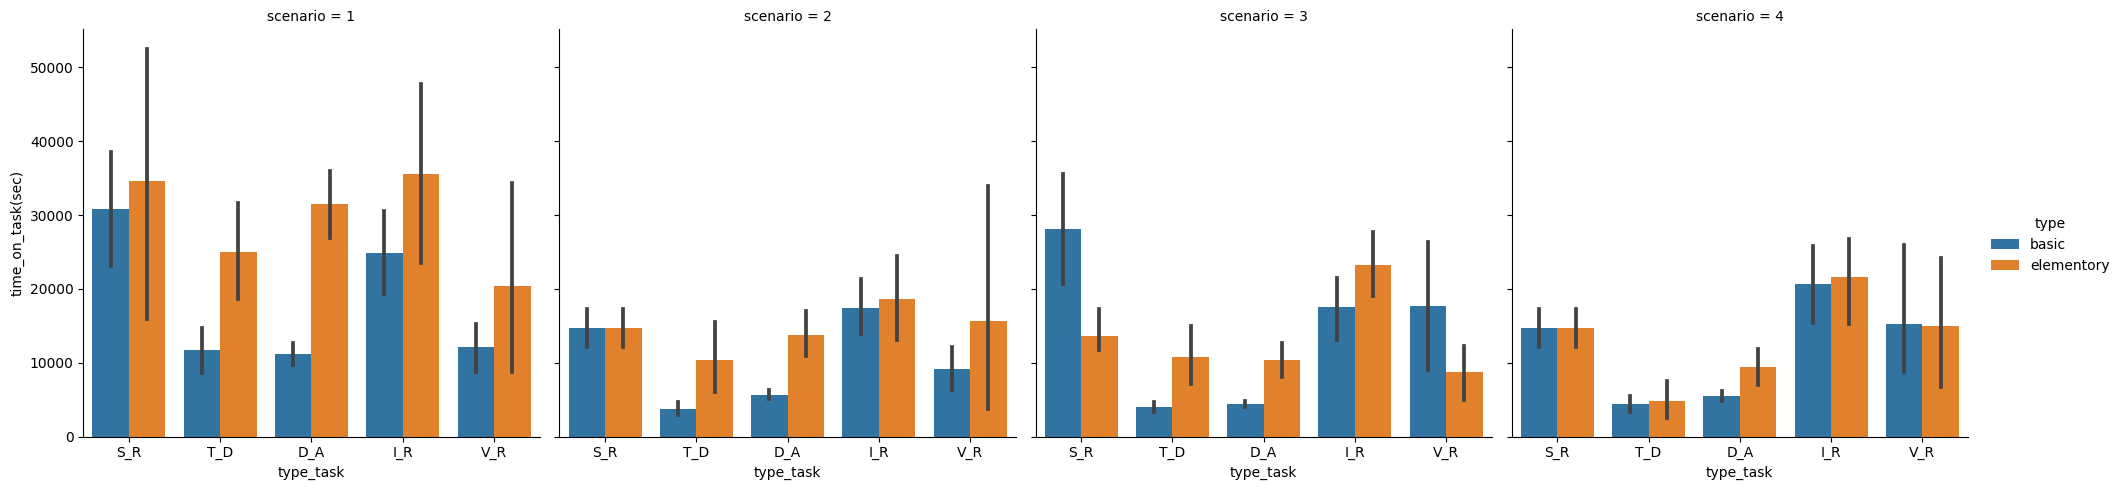

In [6]:
res_1=pd.concat([basic_1,elementary_1,basic_2,elementary_2,basic_3,elementary_3,basic_4,elementary_4])

d_a=open("data analiz.txt")
lines=d_a.readlines()
id_task_DA=[]
d=[]
for i in lines:
    f=i.split(' ')[6]
    for el in f:
        if el.isdigit():
            d.append(el)
    g=int(''.join(map(str, d)))
    id_task_DA.append(g)
    d=[]      
d_a.close()

t_d=open("table data.txt")
lines=t_d.readlines()
id_task_TD=[]
d=[]
for i in lines:
    f=i.split(' ')[6]
    for el in f:
        if el.isdigit():
            d.append(el)
    g=int(''.join(map(str, d)))
    id_task_TD.append(g)
    d=[]    
t_d.close()

v_r=open("video render.txt")
lines=v_r.readlines()
id_task_VR=[]
d=[]
for i in lines:
    f=i.split(' ')[6]
    for el in f:
        if el.isdigit():
            d.append(el)
    g=int(''.join(map(str, d)))
    id_task_VR.append(g)
    d=[]    
v_r.close()


s_r=open("speech recognition.txt")
lines=s_r.readlines()
id_task_SR=[]
d=[]
for i in lines:
    f=i.split(' ')[6]
    for el in f:
        if el.isdigit():
            d.append(el)
    g=int(''.join(map(str, d)))
    id_task_SR.append(g)
    d=[]    
s_r.close()

i_r=open("image recognition.txt")
lines=i_r.readlines()
id_task_IR=[]
d=[]
for i in lines:
    f=i.split(' ')[6]
    for el in f:
        if el.isdigit():
            d.append(el)
    g=int(''.join(map(str, d)))
    id_task_IR.append(g)
    d=[]    
i_r.close()

res_1=res_1.assign(type_task='False')
for id in res_1["id"].to_list():
    if id in id_task_DA:
        res_1.loc[(res_1['id']==id), 'type_task']='D_A'
    elif id in id_task_TD:
        res_1.loc[(res_1['id']==id), 'type_task']='T_D'
    elif id in id_task_IR:
        res_1.loc[(res_1['id']==id), 'type_task']='I_R'
    elif id in id_task_SR:
        res_1.loc[(res_1['id']==id), 'type_task']='S_R'
    else:
        res_1.loc[(res_1['id']==id), 'type_task']='V_R'                

sns.catplot(x='type_task',
           y='time_on_task(sec)',
            kind='bar',
            hue='type',
            col='scenario',
            errorbar=('ci', 90),
            data=res_1)
     

График среднего времени выполнения задач для разных классов задач для 2-х скедулеров и 4-х сценариев. Basic-распределенный, elementary-нераспределенный.

T_D: ML: Табличные данные

D_A: Анализ данных

V_R: Рендеринг видео

I_R: ML: Распознавание изображений

S_R: ML: Распознавание речи

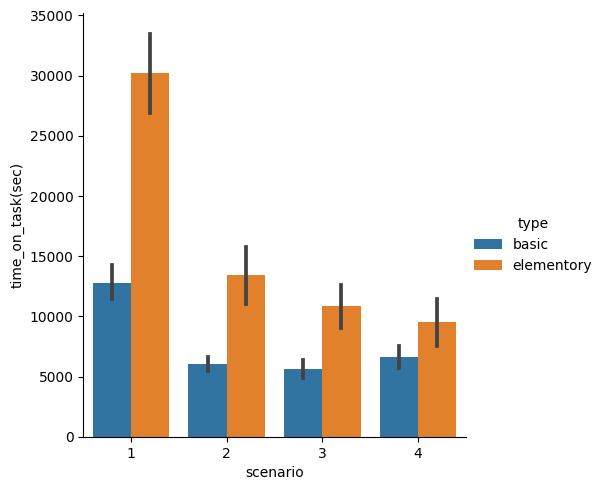

In [7]:
sns.catplot(x='scenario',
           y='time_on_task(sec)',
            kind='bar',
            hue='type',
            
            errorbar=('ci', 90),
            data=res_1)

График эффективнсти(суммаарного времени) для 2-х скедулеров и 4-х сценариев.

In [8]:
print("\033[1m"+"\033[4mСOUNT OF COMPLETED TASKS:\033[0m")
print()

print("Time of simulation = 43_200_000 ms")
print()

print(f"Сount of completed tasks in 1 scenario (basic scheduler) = {len(basic_1['id'])}")
print(f"Сount of completed tasks in 1 scenario (elementary scheduler) ={len(elementary_1['id'])}")
print()

print(f"Сount of completed tasks in 2 scenario (basic scheduler) = {len(basic_2['id'])}")
print(f"Сount of completed tasks in 2 scenario (elementary scheduler) = {len(elementary_2['id'])}")
print()

print(f"Сount of completed tasks in 3 scenario (basic scheduler) = {len(basic_3['id'])}")
print(f"Сount of completed tasks in 3 scenario (elementary scheduler) = {len(elementary_3['id'])}")
print()

print(f"Сount of completed tasks in 4 scenario (basic scheduler) = {len(basic_4['id'])}")
print(f"Сount of completed tasks in 4 scenario (elementary scheduler) = {len(elementary_4['id'])}")

СOUNT OF COMPLETED TASKS:

Time of simulation = 43_200_000 ms

Сount of completed tasks in 1 scenario (basic scheduler) = 194
Сount of completed tasks in 1 scenario (elementary scheduler) =194

Сount of completed tasks in 2 scenario (basic scheduler) = 174
Сount of completed tasks in 2 scenario (elementary scheduler) = 174

Сount of completed tasks in 3 scenario (basic scheduler) = 151
Сount of completed tasks in 3 scenario (elementary scheduler) = 151

Сount of completed tasks in 4 scenario (basic scheduler) = 112
Сount of completed tasks in 4 scenario (elementary scheduler) = 112


In [9]:
print("\033[1m"+"\033[4mEFFECTIVENESS (CALC_SIZE/TIME_ON_TASK(sec)):\033[0m")
print()

effect_1=(basic_1['calc_size'].sum()/basic_1['time_on_task(sec)'].sum())/(elementary_1['calc_size'].sum()/elementary_1['time_on_task(sec)'].sum())
print(f"Effectiveness basic/elementary (scenario 1) = {effect_1}")

effect_2=(basic_2['calc_size'].sum()/basic_2['time_on_task(sec)'].sum())/(elementary_2['calc_size'].sum()/elementary_2['time_on_task(sec)'].sum())
print(f"Effectiveness basic/elementary (scenario 2) = {effect_2}")

effect_3=(basic_3['calc_size'].sum()/basic_3['time_on_task(sec)'].sum())/(elementary_3['calc_size'].sum()/elementary_3['time_on_task(sec)'].sum())
print(f"Effectiveness basic/elementary (scenario 3) = {effect_3}")

effect_4=(basic_4['calc_size'].sum()/basic_4['time_on_task(sec)'].sum())/(elementary_4['calc_size'].sum()/elementary_4['time_on_task(sec)'].sum())
print(f"Effectiveness basic/elementary (scenario 4) = {effect_4}")

EFFECTIVENESS (CALC_SIZE/TIME_ON_TASK(sec)):

Effectiveness basic/elementary (scenario 1) = 2.370114088960117
Effectiveness basic/elementary (scenario 2) = 2.2337236881395026
Effectiveness basic/elementary (scenario 3) = 1.937384097541788
Effectiveness basic/elementary (scenario 4) = 1.4443726851096927
